# Binary classification

Classify IMDB movie reviews as positive or negative

In [25]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [26]:
# Encoding the integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
# vectorise train/test data
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [28]:
# create the model
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [29]:
# create a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [30]:
# train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5412 - accuracy: 0.7688 - val_loss: 0.4127 - val_accuracy: 0.8648
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3327 - accuracy: 0.8985 - val_loss: 0.3276 - val_accuracy: 0.8807
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2448 - accuracy: 0.9237 - val_loss: 0.3172 - val_accuracy: 0.8729
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1943 - accuracy: 0.9394 - val_loss: 0.2764 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1609 - accuracy: 0.9505 - val_loss: 0.2736 - val_accuracy: 0.8902
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1309 - accuracy: 0.9626 - val_loss: 0.2837 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1137 - accuracy: 0.9661 - val_loss: 0.3014 - val_accuracy: 0.8818
Epoch 8/20
30

In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plotting the training and validation loss

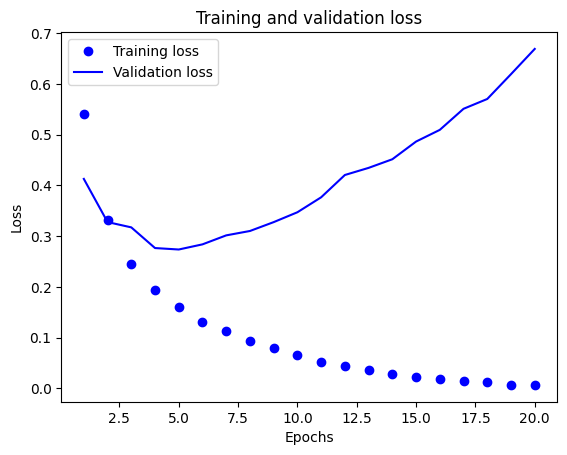

In [32]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracy

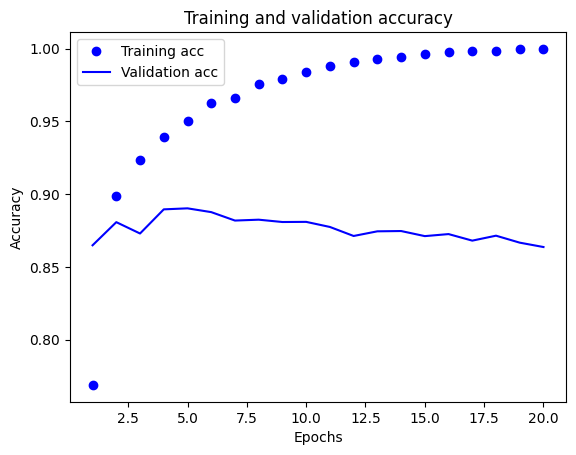

In [33]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
# recreate and retrain the model with fewer epochs to prevent overfitting
model = models.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [35]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              #loss="mse",
              metrics=["accuracy"])

In [36]:
history = model.fit(x_train, y_train, epochs=4, batch_size=32)

Epoch 1/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3188 - accuracy: 0.8713
Epoch 2/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2126 - accuracy: 0.9201
Epoch 3/4
782/782 [==============================] - 2s 2ms/step - loss: 0.1802 - accuracy: 0.9333
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.1611 - accuracy: 0.9398


In [37]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

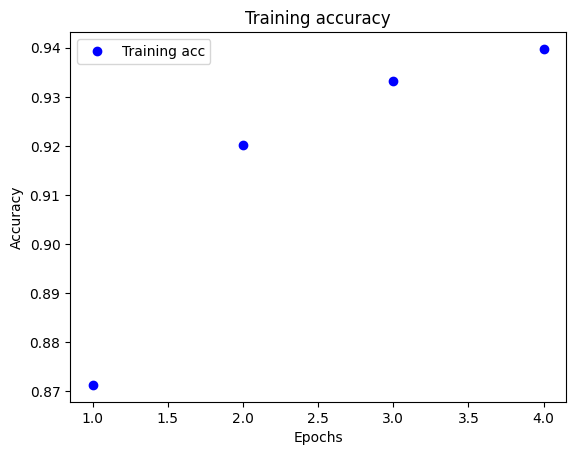

In [39]:
plt.clf()
acc = history_dict["accuracy"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training acc")
plt.title("Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [40]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 873us/step - loss: 0.3343 - accuracy: 0.8740


[0.33433371782302856, 0.8740000128746033]

In [41]:
model.predict(x_test)

782/782 [==============================] - 1s 755us/step


array([[0.13399816],
       [0.99990433],
       [0.9909954 ],
       ...,
       [0.31569976],
       [0.11324757],
       [0.76173913]], dtype=float32)